# Installing Packages

In [1]:
import os
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, levene, ranksums
from sklearn.linear_model import LinearRegression
import numpy as np
import pyBigWig
import math
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import multipletests
from statsmodels.multivariate.manova import MANOVA
from scipy import stats
import statsmodels.api as sm
from matplotlib import gridspec
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
import glob
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Loading Samples (262 without Holdout-Dataset)

In [2]:
cancer_samples = [
    # bile duct cancer
    "EE87789", "EE87790", "EE87791", "EE87792", "EE87793", "EE87794",
    "EE87795", "EE87796", "EE87797", "EE87798", "EE87799", "EE87800",
    "EE87801", "EE87802", "EE87803", "EE87804", "EE87805", "EE87806",
    "EE87807", "EE87809", "EE87810", "EE88325",

    # colorectal cancer
    # nicht in clinical table
    "EE85727", "EE85730", "EE85731", "EE85732", "EE85733", "EE85734",
    "EE85737", "EE85739", "EE85741", "EE85743", "EE85746", "EE85749",
    "EE85750", "EE85752", "EE85753", "EE86234", "EE86255", "EE86259",



    "EE87865", "EE87866", "EE87867", "EE87868", "EE87869", "EE87870",
    "EE87871", "EE87872", "EE87873", "EE87874", "EE87875", "EE87876",
    "EE87877", "EE87878", "EE87879", "EE87880", "EE87881", "EE87882",
    "EE87883", "EE87884", "EE87885", "EE87886", "EE87887", "EE87888",
    "EE87889", "EE87890", "EE87891",

    # gastric cancer
    "EE87896", "EE87897", "EE87898", "EE87899", "EE87900", "EE87901",
    "EE87902", "EE87903", "EE87904", "EE87905", "EE87906", "EE87907",
    "EE87908", "EE87909", "EE87910", "EE87911", "EE87912", "EE87913",
    "EE87914", "EE87915", "EE87916", "EE87917", "EE87918", "EE87919",

    # pancreatic cancer
    "EE86268", "EE86270", "EE86271", "EE86272", "EE86273",
    "EE88290", "EE88291", "EE88292", "EE88293", "EE88294", "EE88295",
    "EE88296", "EE88297", "EE88298", "EE88299", "EE88300", "EE88301",
    "EE88302", "EE88303", "EE88304", "EE88305", "EE88306", "EE88307",
    "EE88308", "EE88309", "EE88310", "EE88311", "EE88312", "EE88313",
    "EE88314", "EE88315", "EE88316", "EE88317", "EE88318", "EE88319",
    "EE88320", "EE88321", "EE88322", "EE88323", "EE88324"
]
control_samples = [

    # healthy controls
    # nicht in clinical table
    "EE85898", "EE85904", "EE85905", "EE85908", "EE85918", "EE85928",
    "EE85936", "EE85937", "EE85941", "EE85959", "EE85963", "EE85970",
    "EE85971", "EE85980", "EE85985", "EE85987", "EE85988", "EE86275",
    "EE86276", "EE87945", "EE87946",
    

    
    "EE87920", "EE87921", "EE87922", "EE87923", "EE87924",
    "EE87925", "EE87926", "EE87927", "EE87928", "EE87929", "EE87931",
    "EE87932", "EE87933", "EE87934", "EE87935", "EE87936", "EE87937",
    "EE87938", "EE87939", "EE87940", "EE87941", "EE87942", "EE87943",
    "EE87944", "EE87947", "EE87948", "EE87949",
    "EE87950", "EE87951", "EE87952", "EE87953", "EE87954", "EE87955",
    "EE87956", "EE87957", "EE87958", "EE87959", "EE87960", "EE87961",
    "EE87962", "EE87963", "EE87964", "EE87965", "EE87966", "EE87967",
    "EE87968", "EE87969", "EE87970", "EE87971", "EE87972", "EE87973",
    "EE87974", "EE87975", "EE87976", "EE87977", "EE87978", "EE87979",
    "EE87980", "EE87981", "EE87982", "EE87983", "EE87984", "EE87985",
    "EE87986", "EE87987", "EE87988", "EE87989", "EE87990", "EE87991",
    "EE87992", "EE87993", "EE87994", "EE87995", "EE87996", "EE87997",
    "EE87998", "EE87999", "EE88000", "EE88001", "EE88002", "EE88003",
    "EE88004", "EE88005", "EE88006", "EE88007", "EE88008", "EE88009",
    "EE88010", "EE88011", "EE88012", "EE88013", "EE88014", "EE88015",
    "EE88016", "EE88017", "EE88018", "EE88019", "EE88020", "EE88021",
    "EE88022", "EE88023", "EE88024", "EE88025", "EE88026", "EE88027",
    "EE88028", "EE88029", "EE88030", "EE88031", "EE88032"
]

BASE_DIR = "/labmed/workspace/lotta/finaletoolkit/output_workflow"

def find_sample_folder(sample, base_dir=BASE_DIR):
    for root, dirs, files in os.walk(base_dir):
        for f in files:
            if f.startswith(sample) and f.endswith(".adjust_wps.bw"):
                return root
    return None

def get_bigwig_path(sample):
    folder = find_sample_folder(sample)
    if folder is None:
        raise FileNotFoundError(f"Sample {sample} not found in {BASE_DIR}")
    return os.path.join(folder, f"{sample}.adjust_wps.bw")

def bigwig_summary(bigwig_path, chrom, start, end, n_bins=1):
    bw = pyBigWig.open(bigwig_path)
    bin_size = (end - start) // n_bins
    results = []
    
    for i in range(n_bins):
        b_start = start + i * bin_size
        b_end = start + (i+1) * bin_size if i < n_bins - 1 else end
        
        vals = bw.values(chrom, b_start, b_end)
        vals = [v for v in vals if v is not None and not math.isnan(v)]
        
        results.append(sum(vals)/len(vals) if vals else 0)

    bw.close()
    return results

all_samples = cancer_samples + control_samples
print(f"Configuration loaded for {len(all_samples)} samples:")
print(all_samples)

Configuration loaded for 262 samples:
['EE87789', 'EE87790', 'EE87791', 'EE87792', 'EE87793', 'EE87794', 'EE87795', 'EE87796', 'EE87797', 'EE87798', 'EE87799', 'EE87800', 'EE87801', 'EE87802', 'EE87803', 'EE87804', 'EE87805', 'EE87806', 'EE87807', 'EE87809', 'EE87810', 'EE88325', 'EE85727', 'EE85730', 'EE85731', 'EE85732', 'EE85733', 'EE85734', 'EE85737', 'EE85739', 'EE85741', 'EE85743', 'EE85746', 'EE85749', 'EE85750', 'EE85752', 'EE85753', 'EE86234', 'EE86255', 'EE86259', 'EE87865', 'EE87866', 'EE87867', 'EE87868', 'EE87869', 'EE87870', 'EE87871', 'EE87872', 'EE87873', 'EE87874', 'EE87875', 'EE87876', 'EE87877', 'EE87878', 'EE87879', 'EE87880', 'EE87881', 'EE87882', 'EE87883', 'EE87884', 'EE87885', 'EE87886', 'EE87887', 'EE87888', 'EE87889', 'EE87890', 'EE87891', 'EE87896', 'EE87897', 'EE87898', 'EE87899', 'EE87900', 'EE87901', 'EE87902', 'EE87903', 'EE87904', 'EE87905', 'EE87906', 'EE87907', 'EE87908', 'EE87909', 'EE87910', 'EE87911', 'EE87912', 'EE87913', 'EE87914', 'EE87915', 'EE8

# Cancer Typ aus dem Pfad extrahieren

In [3]:
def get_cancer_type(sample):
    folder = find_sample_folder(sample)  
    if folder is None:
        return "Unknown"
    return os.path.basename(folder) 

# Creating and Loading of Bedgraph Files 

In [4]:
bedgraph_dir = os.path.expanduser('/labmed/workspace/lotta/finaletoolkit/output_workflow')

all_dfs = []
exclude_chroms = ['chrX', 'chrY']
if os.path.exists("/labmed/workspace/lotta/finaletoolkit/dataframes_for_ba/combined_df.parquet"):
    print("Loading existing combined dataframe...")
    combined_df = pd.read_parquet("/labmed/workspace/lotta/finaletoolkit/dataframes_for_ba/combined_df.parquet")
else:
    def find_bedgraphs(sample_id):
        # pattern ist der gesuchte Dateipfad
        pattern = os.path.join(bedgraph_dir, "**", f"{sample_id}.adjust_wps.bedgraph")
        # matches sind alle gefundenen Dateien, die dem Muster entsprechen
        matches = glob.glob(pattern, recursive=True)
        # Gibt die erste gefundene Datei zurück 
        return matches[0] if matches else None

    for sample_id in cancer_samples:
        file_path = find_bedgraphs(sample_id)
        if file_path:
            df = pd.read_csv(file_path, sep="\t", header=None, names=["chrom", "start", "end", "wps_value"])
            df['sample'] = sample_id
            group = get_cancer_type(sample_id)
            df['group'] = group
            all_dfs.append(df)
        else:
            print(f"Bedgraph file for sample {sample_id} not found.")

    for sample_id in control_samples:
        file_path = find_bedgraphs(sample_id)
        if file_path:
            df = pd.read_csv(file_path, sep="\t", header=None, names=["chrom", "start", "end", "wps_value"])
            df['sample'] = sample_id
            group = get_cancer_type(sample_id)
            df['group'] = group
            all_dfs.append(df)
        else:
            print(f"Bedgraph file for sample {sample_id} not found.")

    combined_df = pd.concat(all_dfs, ignore_index=True)

    print(f"Data of {len(all_dfs)} samples successfully loaded.")
    combined_df.to_parquet("/labmed/workspace/lotta/finaletoolkit/dataframes_for_ba/combined_df.parquet", index=False)

Loading existing combined dataframe...


# Global Analysis of Fragmentsize 

# Median Comparison between Cancer und Control 


In [5]:
tsv_dir = os.path.expanduser('/labmed/workspace/lotta/finaletoolkit/output_workflow')
results = []

for sample in all_samples:
    tsv_path = os.path.join(tsv_dir, '**', f"{sample}.frag_length_bins.tsv")
    files = glob.glob(tsv_path, recursive=True)
    if not files:
        print(f"TSV file for sample {sample} not found.")
        continue
    df = pd.read_csv(files[0], sep="\t")
    peak_index = df['count'].idxmax()
    peak_row = df.loc[peak_index]
    peak_length = (peak_row['min'] + peak_row['max']) / 2
    group = 'cancer' if sample in cancer_samples else 'control'
    results.append({'sample': sample, 'group': group, 'peak_length': peak_length, 'cancer_type': get_cancer_type(sample)})

results_frag_length_df = pd.DataFrame(results)
group_summary = results_frag_length_df.groupby('group')['peak_length'].mean().reset_index()
print("Mean Peak Lengths:")
print(group_summary)

Mean Peak Lengths:
     group  peak_length
0   cancer   166.038168
1  control   166.931298


# Visualisation of Results: Cancer vs. Control, Line Plot

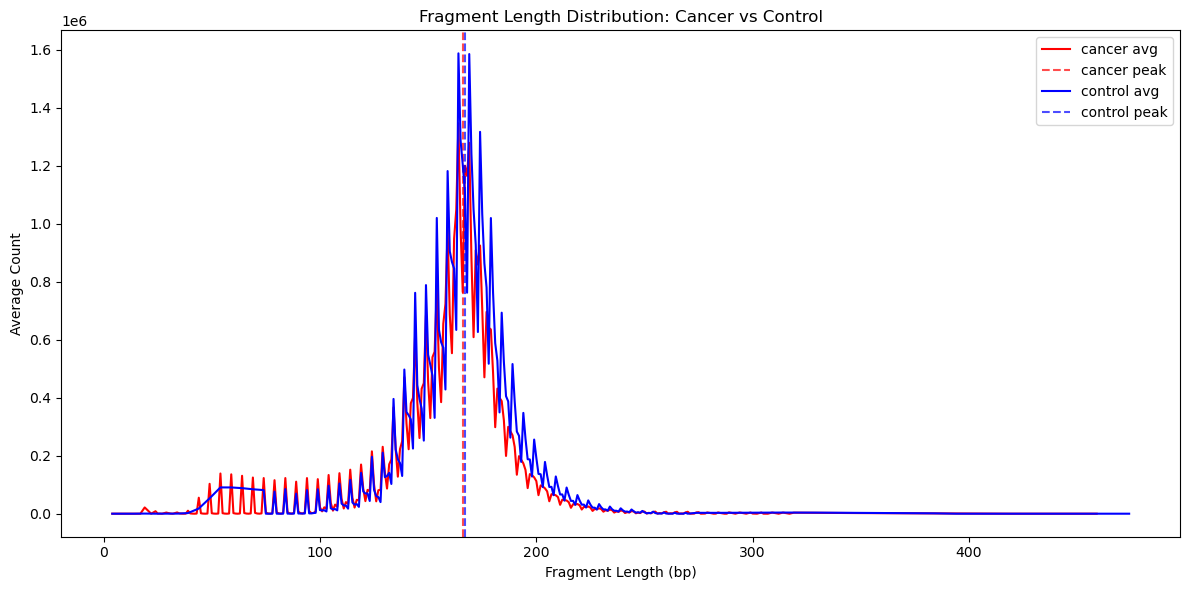

In [6]:
tsv_dir = os.path.expanduser('/labmed/workspace/lotta/finaletoolkit/output_workflow')

groups = ['cancer', 'control']
avg_freq = {}

for group in groups:
    group_samples = results_frag_length_df[results_frag_length_df['group'] == group]['sample'].tolist()

    # Define dictionary before loop so we can accumulate counts per sample!
    combined_counts = {}
    
    for sample in group_samples:
        tsv_path = os.path.join(tsv_dir, '**', f"{sample}.frag_length_bins.tsv")
        files = glob.glob(tsv_path, recursive=True)
        if not files:
            continue
        df = pd.read_csv(files[0], sep="\t")

        df['frag_mid'] = (df['min'] + df['max']) / 2
        
        # Here we accumulate counts for each fragment length across samples --> we need the dicitonary defined outside the loop
        for frag, count in zip(df['frag_mid'], df['count']):
            combined_counts[frag] = combined_counts.get(frag, 0) + count

    # Average counts over number of samples in the group
    for frag in combined_counts:
        combined_counts[frag] /= len(group_samples)
    avg_freq[group] = pd.Series(combined_counts).sort_index()


plt.figure(figsize=(12,6))

for group, color in zip(groups, ['red', 'blue']):
    x = avg_freq[group].index.to_numpy(dtype=float)
    y = avg_freq[group].astype(float).to_numpy()

    plt.plot(x, y, label=f"{group} avg", color=color)

    peak = results_frag_length_df[results_frag_length_df['group'] == group]['peak_length'].mean()
    peak = float(peak)

    plt.axvline(peak, linestyle='--', color=color, alpha=0.7, label=f"{group} peak")


plt.xlabel("Fragment Length (bp)")
plt.ylabel("Average Count")
plt.title("Fragment Length Distribution: Cancer vs Control")
plt.legend()
plt.tight_layout()
plt.show()


# Visualisation of Results: Cancer vs. Control, Boxplot

/tmp/ipykernel_1354151/2787012296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
No handles with labels found to put in legend.


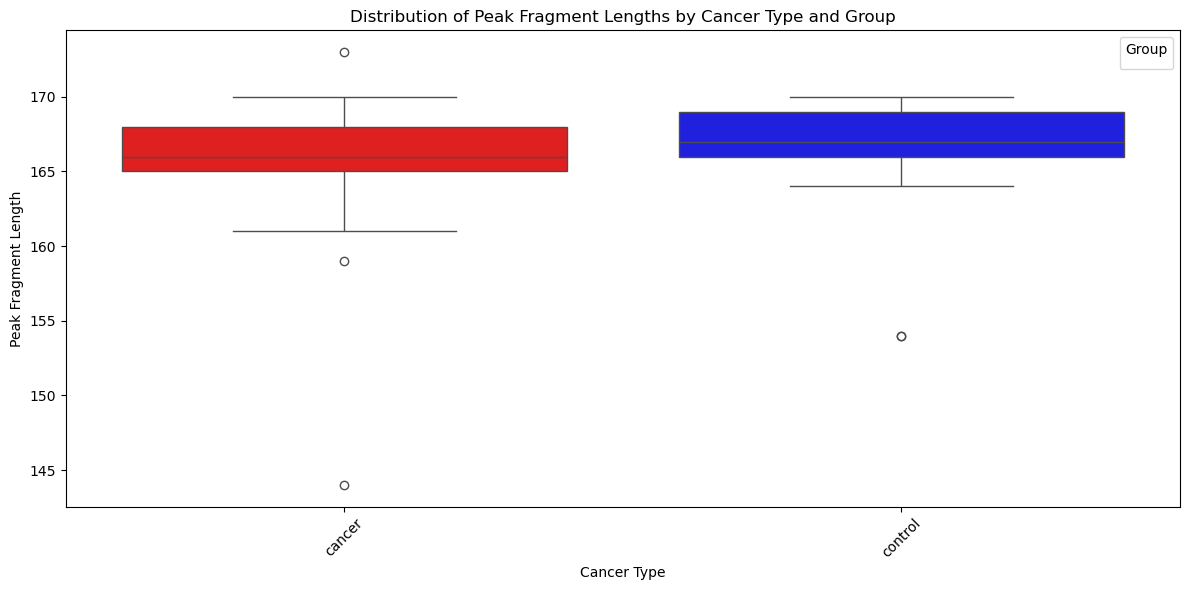

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=results_frag_length_df,
    x='group',
    y='peak_length',
    palette={'cancer':'red', 'control':'blue'}
)

plt.xticks(rotation=45)
plt.ylabel("Peak Fragment Length")
plt.xlabel("Cancer Type")
plt.title("Distribution of Peak Fragment Lengths by Cancer Type and Group")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

# Visualisation of Results: Individual Cancer Groups (Pancreatic, Colorectal..)


/tmp/ipykernel_1354151/2951775342.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


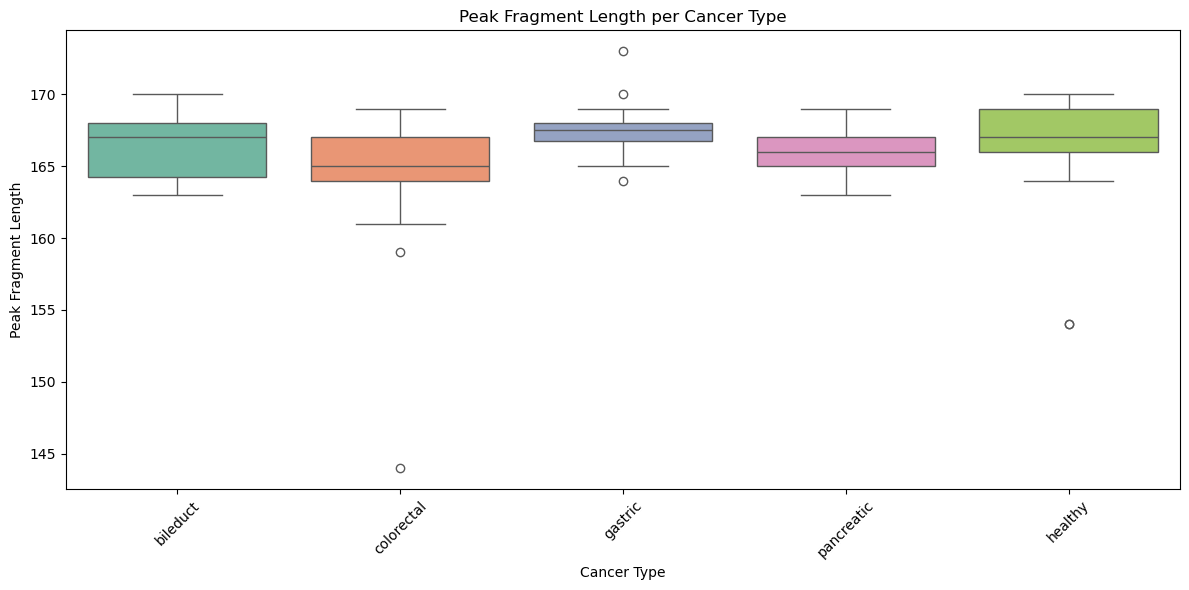

In [8]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=results_frag_length_df,
    x='cancer_type',
    y='peak_length',
    palette="Set2"
)

plt.xticks(rotation=45)
plt.ylabel("Peak Fragment Length")
plt.xlabel("Cancer Type")
plt.title("Peak Fragment Length per Cancer Type")
plt.tight_layout()
plt.show()


Paper Fragment lenght profiles:
- definiert kurze Fragmente als 100 - 150 und lange Fragmente als 151 - 250
-   ◦ Kurze ALT-Fragmente: ALT-Fragmente, die kürzer als 150 bp waren
    ◦ Lange ALT-Fragmente: ALT-Fragmente, die länger als 150 bp waren (nehme ich auch noch rein)


# Matrix of Statistical Values of Cancer vs. Control Groups


In [9]:
if not os.path.exists("dataframes_for_ba/frag_length_metrics.parquet"):
    results_frag_length_df = pd.read_parquet("/labmed/workspace/lotta/finaletoolkit/dataframes_for_ba/frag_length_metrics.parquet")
else:
    results = []
    def get_cancer_type_fixed(sample):
        folder = find_sample_folder(sample)  
        if folder is None:
            return "Unknown"
        return os.path.basename(folder)  
    
    for sample in all_samples:
        tsv_path = os.path.join(tsv_dir, '**', f"{sample}.frag_length_bins.tsv")
        files = glob.glob(tsv_path, recursive=True)
        if not files:
            print(f"TSV file for sample {sample} not found.")
            continue
        df = pd.read_csv(files[0], sep="\t")
        vals = (df['min'] + df['max']) / 2
        counts = df['count']
        total_counts = counts.sum()

        mean_val = (vals * counts).sum() / total_counts

        df['cum_count'] = counts.cumsum()
        median_row = df[df['cum_count'] >= total_counts / 2].iloc[0]

        #median fragment length
        median_val = (median_row['min'] + median_row['max']) / 2

        # standard deviation
        std_val = ((counts * (vals - mean_val)**2).sum() / total_counts)**0.5
        min_val = df['min'].min()
        max_val = df['max'].max()

        # Mononucleosomal peak area (147-201bp), short fragment ratio (50-150bp), mono/di ratio (147-201bp / 310-370bp)
        mono_peak = df[(df['min'] >= 147) & (df['max'] <= 201)]['count'].sum()
        short_frag = df[(df['min'] >= 50) & (df['max'] <= 150)]['count'].sum()
        di_peak = df[(df['min'] >= 310) & (df['max'] <= 370)]['count'].sum()

        # Muss ich noch mit Paper "beweisen", aber 143 ist cacnerous peak und 167 healthy peak in den meisten Papern
        cancerous_peak_area = df[(df['min'] >= 130) & (df['max'] <= 150)]['count'].sum()
        healthy_peak_area = df[(df['min'] >= 160) & (df['max'] <= 170)]['count'].sum()
        ultra_short_peaks = df[(df['min'] >= 90) & (df['max'] <= 120)]['count'].sum()
        cancerous_peaks_ratio = cancerous_peak_area / total_counts
        healthy_peaks_ratio = healthy_peak_area / total_counts
        ultra_short_peaks_ratio = ultra_short_peaks / total_counts
        cancer_healthy_ratio = cancerous_peak_area / healthy_peak_area if healthy_peak_area > 0 else None

        # ALT fraction 
        short_alt_area =  df[df['max'] <= 150]['count'].sum()
        long_alt_area =  df[df['min'] > 150]['count'].sum()
        alt_ratio = short_alt_area / (short_alt_area + long_alt_area) 


        short_frag_ratio = short_frag / total_counts
        mono_di_ratio = mono_peak / di_peak if di_peak > 0 else None

        group = "cancer" if sample in cancer_samples else "control"

        results.append({
            "sample": sample,
            "group": group,
            "cancer_type": get_cancer_type_fixed(sample),
            "mean_fragment": mean_val,
            "median_fragment": median_val,
            "std_fragment": std_val,
            "min_fragment": min_val,
            "max_fragment": max_val,
            "mono_peak_area": mono_peak,
            "short_fragment_ratio": short_frag_ratio,
            "mono_di_ratio": mono_di_ratio,
            "cancerous_peaks_ratio": cancerous_peaks_ratio,
            "healthy_peaks_ratio": healthy_peaks_ratio,
            "cancer_healthy_ratio": cancer_healthy_ratio,
            "ultra_short_peaks_ratio": ultra_short_peaks_ratio,
            "alt_ratio": alt_ratio
        })

    results_frag_length_df = pd.DataFrame(results)
    results_frag_length_df.to_parquet("dataframes_for_ba/frag_length_metrics.parquet", index=False)
    print(f"Extracted metrics for {len(results_frag_length_df)} samples")

In [10]:
# Mean peak lengths of cancerous and healthy groups

results_frag_length_df.groupby('group')[['cancerous_peaks_ratio', 'healthy_peaks_ratio']].mean()

,cancerous_peaks_ratio,healthy_peaks_ratio
group,,
cancer,0.142126,0.191662
control,0.114896,0.172392


In [11]:
print(
    results_frag_length_df[['sample', 'group', 'cancerous_peaks_ratio', 'healthy_peaks_ratio']]
    .sort_values(by=['group', 'cancerous_peaks_ratio'])
    .to_string(index=False)
)


 sample   group  cancerous_peaks_ratio  healthy_peaks_ratio
EE88306  cancer               0.081638             0.140574
EE87911  cancer               0.083876             0.149986
EE87901  cancer               0.084592             0.143848
EE88291  cancer               0.089611             0.145120
EE87899  cancer               0.091435             0.143792
EE86270  cancer               0.092277             0.131244
EE88302  cancer               0.092293             0.147018
EE87904  cancer               0.093562             0.140174
EE87907  cancer               0.094611             0.125518
EE87794  cancer               0.095184             0.141501
EE87914  cancer               0.096411             0.186585
EE88321  cancer               0.096953             0.172861
EE87793  cancer               0.098466             0.174641
EE87797  cancer               0.098579             0.124677
EE87918  cancer               0.100885             0.144058
EE88314  cancer               0.101075  

# Plotting Boxplots for Important Fragment Length Metrics


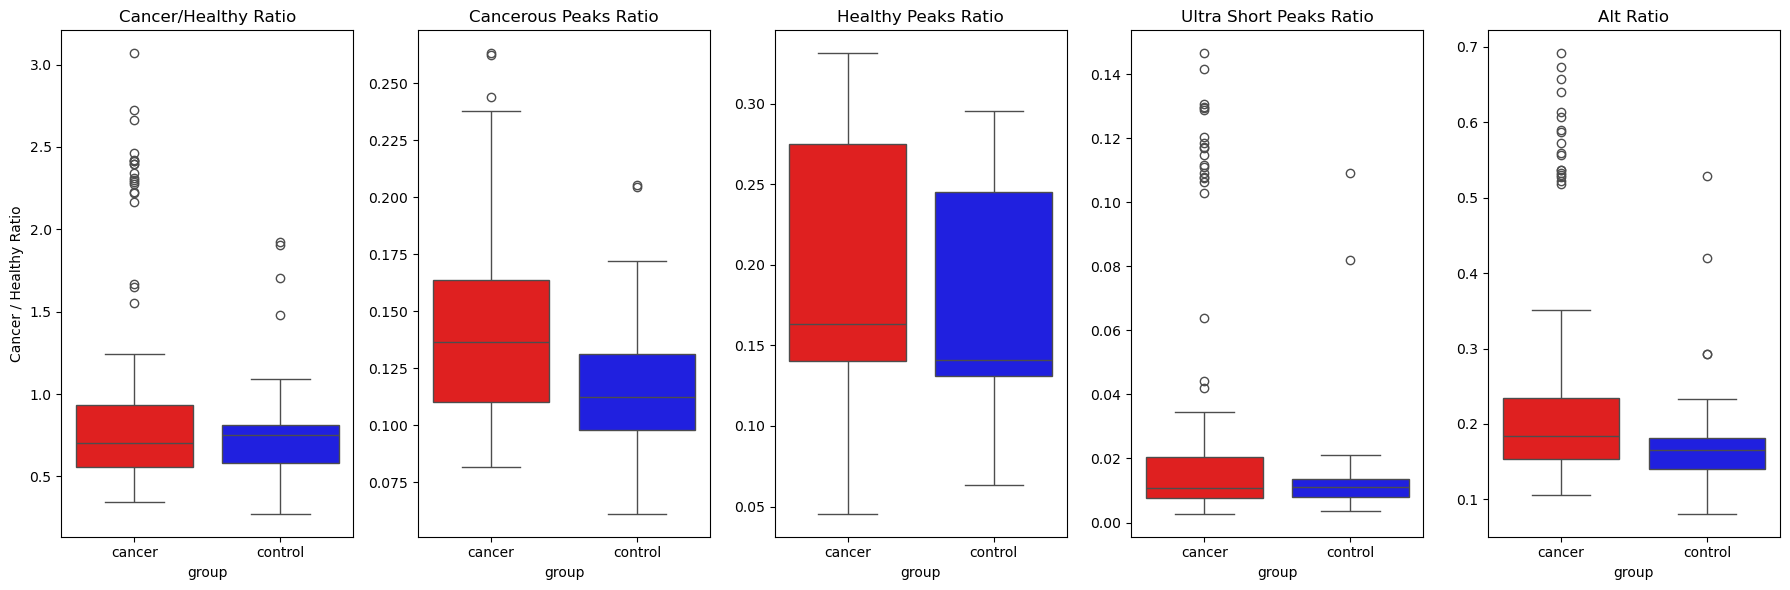

In [12]:
palette_colors = {'cancer': 'red', 'control': 'blue'}
fig, axes = plt.subplots(1, 5, figsize=(18, 6))

sns.boxplot(
    data=results_frag_length_df,
    x="group",
    y="cancer_healthy_ratio",
    ax=axes[0],
    hue="group",
    palette=palette_colors,
    dodge=False,
    legend=False,
)
axes[0].set_title('Cancer/Healthy Ratio')
axes[0].set_ylabel('Cancer / Healthy Ratio')

sns.boxplot(
    data=results_frag_length_df,
    x="group",
    y="cancerous_peaks_ratio",
    ax=axes[1],
    hue="group",
    palette=palette_colors,
    dodge=False,
    legend=False,
)
axes[1].set_title('Cancerous Peaks Ratio')
axes[1].set_ylabel('') 

sns.boxplot(
    data=results_frag_length_df,
    x="group",
    y="healthy_peaks_ratio",
    ax=axes[2],
    hue="group",
    palette=palette_colors,
    dodge=False,
    legend=False,
)
axes[2].set_title('Healthy Peaks Ratio')
axes[2].set_ylabel('') 

sns.boxplot(
    data=results_frag_length_df,
    x="group",
    y="ultra_short_peaks_ratio",
    ax=axes[3],
    hue="group",
    palette=palette_colors,
    dodge=False,
    legend=False,
)
axes[3].set_title('Ultra Short Peaks Ratio')
axes[3].set_ylabel('')

sns.boxplot(
    data=results_frag_length_df,
    x="group",
    y="alt_ratio",
    ax=axes[4],
    hue="group",
    palette=palette_colors,
    dodge=False,
    legend=False,
)
axes[4].set_title('Alt Ratio')
axes[4].set_ylabel('')

plt.tight_layout() 

plt.show()

In [13]:
#(results_frag_length_df['cancerous_peaks'].describe)
print(results_frag_length_df.head())


    sample   group cancer_type  mean_fragment  median_fragment  std_fragment  \
0  EE87789  cancer    bileduct     166.199948            165.0     18.999741   
1  EE87790  cancer    bileduct     162.001936            164.0     17.222596   
2  EE87791  cancer    bileduct     165.534641            168.0     17.623802   
3  EE87792  cancer    bileduct     165.282833            168.0     19.519054   
4  EE87793  cancer    bileduct     164.777683            164.0     16.108414   

   min_fragment  max_fragment  mono_peak_area  short_fragment_ratio  \
0            88           247        27088459              0.152101   
1            87           236        38202075              0.177389   
2            91           240        29356458              0.175298   
3            66           255        30125343              0.198666   
4            97           236        29982414              0.121123   

   mono_di_ratio  cancerous_peaks_ratio  healthy_peaks_ratio  \
0            NaN            

In [14]:
frag_metrics_df_indexed = results_frag_length_df.set_index('sample')

In [15]:
frag_metrics_df_indexed.drop(columns=['group'], inplace=True)

In [16]:
print(frag_metrics_df_indexed.head())

        cancer_type  mean_fragment  median_fragment  std_fragment  \
sample                                                              
EE87789    bileduct     166.199948            165.0     18.999741   
EE87790    bileduct     162.001936            164.0     17.222596   
EE87791    bileduct     165.534641            168.0     17.623802   
EE87792    bileduct     165.282833            168.0     19.519054   
EE87793    bileduct     164.777683            164.0     16.108414   

         min_fragment  max_fragment  mono_peak_area  short_fragment_ratio  \
sample                                                                      
EE87789            88           247        27088459              0.152101   
EE87790            87           236        38202075              0.177389   
EE87791            91           240        29356458              0.175298   
EE87792            66           255        30125343              0.198666   
EE87793            97           236        29982414   


# Enthropy
Berechne zusätzlich noch die Entropie: 


Hohe Entropie: Verteilung ist breiter, was spezifische für Kontollproben ist da sie sowohl kurze als auch lange Fragmente haben


Niedrige Entropie: Verteilung ist schmaler, was auf Krebsproben hinweist, da sehr viele kurze Fragmente und wenig lange

In [17]:
'''entropy_results = {}

for sample in all_samples:
    tsv_dir = os.path.expanduser('/labmed/workspace/lotta/finaletoolkit/output_workflow')
    tsv_path = os.path.join(tsv_dir, '**', f"{sample}.frag_length_bins.tsv")
    files = glob.glob(tsv_path, recursive=True)
    if not files:
        print(f"TSV file for sample {sample} not found.")
        continue
    df = pd.read_csv(files[0], sep="\t")
    p = df['count'] / total_counts
    entropy = -np.sum(p * np.log2(p + 1e-10))
    entropy_results[sample] = entropy
entropy_df = pd.DataFrame.from_dict(entropy_results, orient='index', columns=['entropy'])
master_feature_matrix["shannon_entropy"] = \ master_feature_matrix.index.map(entropy_results)'''

'entropy_results = {}\n\nfor sample in all_samples:\n    tsv_dir = os.path.expanduser(\'/labmed/workspace/lotta/finaletoolkit/output_workflow\')\n    tsv_path = os.path.join(tsv_dir, \'**\', f"{sample}.frag_length_bins.tsv")\n    files = glob.glob(tsv_path, recursive=True)\n    if not files:\n        print(f"TSV file for sample {sample} not found.")\n        continue\n    df = pd.read_csv(files[0], sep="\t")\n    p = df[\'count\'] / total_counts\n    entropy = -np.sum(p * np.log2(p + 1e-10))\n    entropy_results[sample] = entropy\nentropy_df = pd.DataFrame.from_dict(entropy_results, orient=\'index\', columns=[\'entropy\'])\nmaster_feature_matrix["shannon_entropy"] = \\ master_feature_matrix.index.map(entropy_results)'

# Bin-Wide-Analysis, Binning the genome, bin size 5Mb


In [ ]:
bin_size = 250000
if os.path.exists(f"/labmed/workspace/lotta/finaletoolkit/dataframes_for_ba/binned_combined_df_{bin_size}.parquet"):
    print("Loading existing binned combined dataframe...")
    binned_combined_df = pd.read_parquet(f"/labmed/workspace/lotta/finaletoolkit/dataframes_for_ba/binned_combined_df_{bin_size}.parquet")
else:
    combined_df['bin'] = combined_df['start'] // bin_size
    binned_combined_df = combined_df.groupby(['sample', 'group', 'chrom', 'bin'])['wps_value'].mean()
    binned_combined_df = binned_combined_df.reset_index()
    print(binned_combined_df[binned_combined_df['chrom'] =='chr2'])
    binned_combined_df['wps_value'] = binned_combined_df.groupby(['chrom', 'bin'])['wps_value'].transform(lambda x: x.fillna(x.median()))
    binned_combined_df.to_parquet(f"/labmed/workspace/lotta/finaletoolkit/dataframes_for_ba/binned_combined_df_{bin_size}.parquet")

Loading existing binned combined dataframe...


# Feature Matrix for LR rows=sample and columns=bins+groups 


In [19]:
if os.path.exists(f"/labmed/workspace/lotta/finaletoolkit/dataframes_for_ba/final_feature_matrix_{bin_size}.parquet"):
    print("Loading existing final feature matrix...")
    final_feature_matrix = pd.read_parquet(f"/labmed/workspace/lotta/finaletoolkit/dataframes_for_ba/final_feature_matrix_{bin_size}.parquet")
else:
    binned_combined_df['feature_name'] = binned_combined_df['chrom'] + '_bin_' + binned_combined_df['bin'].astype(str)
    feature_matrix = binned_combined_df.pivot(index='sample', columns='feature_name', values='wps_value')
    group_info = binned_combined_df[['sample', 'group']].drop_duplicates().set_index('sample')
    final_feature_matrix = feature_matrix.join(group_info)
    final_feature_matrix = final_feature_matrix.fillna(0)
    final_feature_matrix.to_parquet(f"/labmed/workspace/lotta/finaletoolkit/dataframes_for_ba/final_feature_matrix_{bin_size}.parquet", index=True)
    print(final_feature_matrix.head())

         chr10_bin_0  chr10_bin_1  chr10_bin_10  chr10_bin_11  chr10_bin_12  \
sample                                                                        
EE85727    -0.431917    -1.027036     -0.289272     -0.242474     -0.765612   
EE85730    -0.182007    -0.019362     -0.010708     -0.123687      0.002721   
EE85731    -0.582365    -0.639416     -0.917763     -0.551259     -0.764436   
EE85732    -0.915402    -0.965582     -0.861199     -0.659196     -1.489743   
EE85733    -0.276827    -0.358137     -0.560360     -0.223629     -1.081846   

         chr10_bin_13  chr10_bin_14  chr10_bin_15  chr10_bin_16  chr10_bin_17  \
sample                                                                          
EE85727     -0.768616     -0.624895     -0.722209     -1.086144     -0.426522   
EE85730      0.037411     -0.123918     -0.221466     -0.161473     -0.098700   
EE85731     -0.918626     -0.937134     -1.097520     -1.073884     -0.759449   
EE85732     -1.087771     -1.398333     -

# Fragment Interval Analysis: Loading Files


In [20]:
frag_interval_dir = os.path.expanduser('/labmed/workspace/lotta/finaletoolkit/output_workflow/frag_intervals')
frag_intervals_results = []
for sample in all_samples:
    interval_path = os.path.join(frag_interval_dir, '**', f"{sample}.frag_length_intervals.bed")
    files = glob.glob(interval_path, recursive=True)
    if not files:
        print(f"Fragment length Interval file for sample {sample} not found.")
        continue

    df = pd.read_csv(
    files[0],
    sep="\t",
    header=None,
    names=["chrom", "start", "stop", "name", "mean", "median", "stdev", "min", "max"]
    )
    df = df.iloc[1:].reset_index(drop=True)
    group = get_cancer_type(sample)
    df['sample'] = sample
    df['group'] = group
    df["start"] = df["start"].astype(int)
    df["stop"] = df["stop"].astype(int)

    num_cols = ["mean", "median", "stdev", "min", "max"]
    df[num_cols] = df[num_cols].astype(float)
    df['bin'] = df['start'] // bin_size
    frag_intervals_results.append(df)

frag_intervals_df = pd.concat(frag_intervals_results, ignore_index=True)

In [21]:
print(frag_intervals_df.head())

  chrom    start     stop name        mean  median      stdev    min    max  \
0  chr1   920000   925000    .  159.137255   161.0  16.761323  120.0  190.0   
1  chr1  1070000  1075000    .  167.342857   165.0  16.101363  138.0  208.0   
2  chr1  1165000  1170000    .  166.767442   165.0  21.334367  113.0  233.0   
3  chr1  1170000  1175000    .  162.823529   165.5  21.494829  108.0  201.0   
4  chr1  1175000  1180000    .  170.400000   170.0  18.626862  121.0  218.0   

    sample     group  bin  
0  EE87789  bileduct    0  
1  EE87789  bileduct    0  
2  EE87789  bileduct    0  
3  EE87789  bileduct    0  
4  EE87789  bileduct    0  


# Binning Fragment Interval Files


In [22]:
binned_df = (
    frag_intervals_df.groupby(['sample', 'group', 'chrom', 'bin'])
      .agg({
          "mean": "mean",
          "median": "mean",
          "stdev": "mean",
          "min": "mean",
          "max": "mean"
      })
      .reset_index()
)

print(binned_df.head())
print(binned_df.shape)


    sample       group chrom  bin        mean      median      stdev  \
0  EE85727  colorectal  chr1    0  108.407005  101.469697  26.347923   
1  EE85727  colorectal  chr1    1  124.466628  119.718750  39.403601   
2  EE85727  colorectal  chr1    2  129.958727  127.307692  43.150439   
3  EE85727  colorectal  chr1    3  122.464291  118.678571  29.025657   
4  EE85727  colorectal  chr1    4  112.413292  118.571429  32.362083   

         min         max  
0  72.121212  144.757576  
1  57.375000  181.312500  
2  55.923077  206.230769  
3  73.642857  165.071429  
4  53.428571  155.857143  
(142528, 9)


In [23]:
print(binned_combined_df.head())

    sample   group chrom  bin  wps_value feature_name
0  EE85727  cancer  chr1    0  -0.917097   chr1_bin_0
1  EE85727  cancer  chr1    1  -0.705330   chr1_bin_1
2  EE85727  cancer  chr1    2  -0.476880   chr1_bin_2
3  EE85727  cancer  chr1    3  -0.696038   chr1_bin_3
4  EE85727  cancer  chr1    4  -0.770906   chr1_bin_4


In [ ]:
merged_df = pd.merge(
    binned_df,
    binned_combined_df[['sample', 'chrom', 'bin', 'wps_value']],
    how='left',        # left join, falls manche Bins keinen WPS-Wert haben
    on=['sample', 'chrom', 'bin']
)

print(merged_df.head())
merged_df.to_csv(f"/labmed/workspace/lotta/finaletoolkit/dataframes_notebook/final_feature_matrix_{bin_size}.tsv", sep="\t", index=False)


    sample       group chrom  bin        mean      median      stdev  \
0  EE85727  colorectal  chr1    0  108.407005  101.469697  26.347923   
1  EE85727  colorectal  chr1    1  124.466628  119.718750  39.403601   
2  EE85727  colorectal  chr1    2  129.958727  127.307692  43.150439   
3  EE85727  colorectal  chr1    3  122.464291  118.678571  29.025657   
4  EE85727  colorectal  chr1    4  112.413292  118.571429  32.362083   

         min         max  wps_value  
0  72.121212  144.757576  -0.917097  
1  57.375000  181.312500  -0.705330  
2  55.923077  206.230769  -0.476880  
3  73.642857  165.071429  -0.696038  
4  53.428571  155.857143  -0.770906  
